# Project 2: Supervised Learning
### Building a Student Intervention System

## 1. Classification vs Regression

Your goal is to identify students who might need early intervention - which type of supervised machine learning problem is this, classification or regression? Why?

<b>Classification</b>: Classification is simply the process of taking input and mapping it to some discrete labels, while regression mapping input to continuous value. Because we need to identify 2 labels such as "needs intervention" and "doesn't need intervention", I can say this type of supervised machine learning problem is Classification.

## 2. Exploring the Data

Let's go ahead and read in the student dataset first.

_To execute a code cell, click inside it and press **Shift+Enter**._

In [1]:
# Import libraries
import numpy as np
import pandas as pd

In [2]:
# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"
# Note: The last column 'passed' is the target/label, all other are feature columns

Student data read successfully!


Now, can you find out the following facts about the dataset?
- Total number of students
- Number of students who passed
- Number of students who failed
- Graduation rate of the class (%)
- Number of features

_Use the code block below to compute these values. Instructions/steps are marked using **TODO**s._

In [3]:
# TODO: Compute desired values - replace each '?' with an appropriate expression/function call
n_students = student_data.shape[0]
n_features = student_data.shape[1]
n_passed = np.sum(student_data['passed'] == 'yes')
n_failed = np.sum(student_data['passed'] == 'no')
grad_rate = 100 * float(n_passed)/float(n_students)

print "Total number of students: {}".format(n_students)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class (%): {:.2f}".format(grad_rate)
print "Number of features: {}".format(n_features)

Total number of students: 395
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class (%): 67.09
Number of features: 31


## 3. Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Let's first separate our data into feature and target columns, and see if any features are non-numeric.<br/>
**Note**: For this dataset, the last column (`'passed'`) is the target or label we are trying to predict.

In [4]:
# Extract feature (X) and target (y) columns
feature_cols = list(student_data.columns[:-1])  # all columns but last are features
target_col = student_data.columns[-1]  # last column is the target/label
print "Feature column(s):-\n{}".format(feature_cols)
print "Target column: {}".format(target_col)

X_all = student_data[feature_cols]  # feature values for all students
y_all = student_data[target_col]  # corresponding targets/labels
print "\nFeature values:-"
print X_all.head()  # print the first 5 rows

Feature column(s):-
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
Target column: passed

Feature values:-
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...    

### Preprocess feature columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation.

In [5]:
# Preprocess feature columns
def preprocess_features(X):
    outX = pd.DataFrame(index=X.index)  # output dataframe, initially empty

    # Check each column
    for col, col_data in X.iteritems():
        # If data type is non-numeric, try to replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])
        # Note: This should change the data type for yes/no columns to int

        # If still non-numeric, convert to one or more dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix=col)  # e.g. 'school' => 'school_GP', 'school_MS'

        outX = outX.join(col_data)  # collect column(s) in output dataframe

    return outX

X_all = preprocess_features(X_all)
print "Processed feature columns ({}):-\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48):-
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Split data into training and test sets

So far, we have converted all _categorical_ features into numeric values. In this next step, we split the data (both features and corresponding labels) into training and test sets.

In [6]:
from sklearn.cross_validation import train_test_split

In [7]:
# First, decide how many training vs test samples you want
num_all = student_data.shape[0]  # same as len(student_data)
num_train = 300  # about 75% of the data
num_test = num_all - num_train

# TODO: Then, select features (X) and corresponding labels (y) for the training and test sets
# Note: Shuffle the data or randomly select samples to avoid any bias due to ordering in the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_all,
    y_all,
    test_size=num_test)
#    random_state=3)

print "Training set: {} samples".format(X_train.shape[0])
print "Test set: {} samples".format(X_test.shape[0])
# Note: If you need a validation set, extract it from within training data

Training set: 300 samples
Test set: 95 samples


## 4. Training and Evaluating Models
Choose 3 supervised learning models that are available in scikit-learn, and appropriate for this problem. For each model:

- What are the general applications of this model? What are its strengths and weaknesses?
- Given what you know about the data so far, why did you choose this model to apply?
- Fit this model to the training data, try to predict labels (for both training and test sets), and measure the F<sub>1</sub> score. Repeat this process with different training set sizes (100, 200, 300), keeping test set constant.

Produce a table showing training time, prediction time, F<sub>1</sub> score on training set and F<sub>1</sub> score on test set, for each training set size.

Note: You need to produce 3 such tables - one for each model.

In [8]:
# Train a model
import time

def train_classifier(clf, X_train, y_train, L):
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    L.append(end-start)
    
# Predict on training set and compute F1 score
from sklearn.metrics import f1_score

def predict_labels(clf, features, target, L):
    start = time.time()
    y_pred = clf.predict(features)
    end = time.time()

    L.append(end-start)
    L.append(f1_score(target.values, y_pred, pos_label='yes'))
    return L[-1]

# Train and predict using different training set sizes
def train_predict(clf, X_train, y_train, X_test, y_test):
    L = []
    train_classifier(clf, X_train, y_train, L)
    predict_labels(clf, X_train, y_train, L)
    predict_labels(clf, X_test, y_test, L)
    return L[:-2] + L[-1:]
    
from collections import OrderedDict
def get_perf(clf):
    D = OrderedDict()
    (clf.__class__.__name__)
    D[clf.__class__.__name__] = ['Training time (secs)','Prediction time (secs)',
                                 'F1 score for training set','F1 score for test set']
    for n in (100, 200, 300):
        D[n] = train_predict(clf, X_train[:n], y_train[:n], X_test, y_test)

    return pd.DataFrame(D)

In [9]:
# TODO: Choose a model, import it and instantiate an object
from sklearn.linear_model import LogisticRegression
df = get_perf(LogisticRegression())

In [10]:
# TODO: Choose a model, import it and instantiate an object
from sklearn.ensemble import AdaBoostClassifier
df = get_perf(AdaBoostClassifier())

In [11]:
# TODO: Choose a model, import it and instantiate an object
from sklearn.svm import SVC
df = get_perf(SVC())

In [12]:
# This code is to make box plot for f1_score and training time
D1 = OrderedDict()
D2 = OrderedDict()
D3 = OrderedDict()

D4 = OrderedDict()
D5 = OrderedDict()

N = 100

for clf in [LogisticRegression(), AdaBoostClassifier(), SVC()]:
    clf_name = clf.__class__.__name__
    D1[clf_name] = []
    D2[clf_name] = []
    D3[clf_name] = []
    d4v = np.zeros(3)
    d5v = np.zeros(3)
    for i in range(N):
        X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test)
        df = get_perf(clf)
        D1[clf_name].append(df[300][3]) # f1_score for test data
        D2[clf_name].append(df[300][0]) # training time
        D3[clf_name].append(df[300][1]) # predicting time
        d4v += np.asarray(list(df.ix[0])[1:4]) # predicting time
        d5v += np.asarray(list(df.ix[1])[1:4]) # predicting time
    D4[clf_name] = list(d4v/N)
    D5[clf_name] = list(d5v/N)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


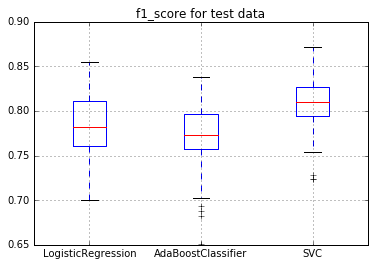

In [13]:
# Plot box plot : f1_score for test data
%pylab inline
pd.DataFrame(D1).plot(kind='box')
title("f1_score for test data")
grid()

Populating the interactive namespace from numpy and matplotlib


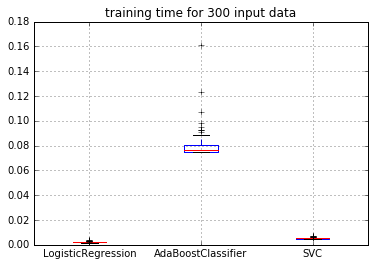

In [14]:
%pylab inline
pd.DataFrame(D2).plot(kind='box')
title('training time for 300 input data')
grid()

Populating the interactive namespace from numpy and matplotlib


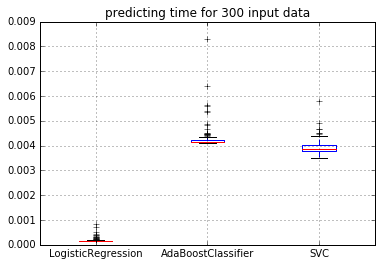

In [15]:
%pylab inline
pd.DataFrame(D3).plot(kind='box')
title('predicting time for 300 input data')
grid()

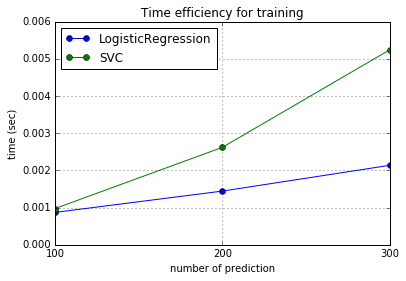

In [16]:
df = pd.DataFrame(D4)
df[['LogisticRegression', 'SVC']].plot(marker='o')
xticks(arange(3), ('100', '200', '300'))
title("Time efficiency for training")
ylabel("time (sec)")
xlabel("number of prediction")
grid()

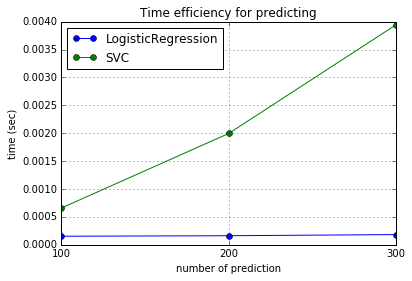

In [17]:
df = pd.DataFrame(D5)
df[['LogisticRegression', 'SVC']].plot(marker='o')
xticks(arange(3), ('100', '200', '300'))
title("Time efficiency for predicting")
ylabel("time (sec)")
xlabel("number of prediction")
grid()

## 5. Choosing the Best Model

- Based on the experiments you performed earlier, in 1-2 paragraphs explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?

- In 1-2 paragraphs explain to the board of supervisors in layman's terms how the final model chosen is supposed to work (for example if you chose a Decision Tree or Support Vector Machine, how does it make a prediction).

- Fine-tune the model. Use Gridsearch with at least one important parameter tuned and with at least 3 settings. Use the entire training set for this.
- What is the model's final F<sub>1</sub> score?

In [18]:
# TODO: Fine-tune your model and report the best F1 score

In [19]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import f1_score

In [20]:
from sklearn.tree import DecisionTreeClassifier

score = 'f1'
c_range = arange(0.01,1.01,0.01)
classifier = LogisticRegression()
parameters = {'C': c_range, 'penalty':['l1','l2']}

In [21]:
y_train[(y_train == "yes")] = 1
y_train[(y_train == "no")] = 0
y_train = list(y_train)

y_test[(y_test == "yes")] = 1
y_test[(y_test == "no")] = 0
y_test = list(y_test)

In [23]:
reg = GridSearchCV(estimator=classifier, param_grid=parameters, scoring=score, cv=3)

In [25]:
reg.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([ 0.01,  0.02, ...,  0.99,  1.  ])},
       pre_dispatch='2*n_jobs', refit=True, scoring='f1', verbose=0)

In [29]:
reg.best_params_

{'C': 0.080000000000000002, 'penalty': 'l1'}

In [27]:
f1_score(y_train, reg.predict(X_train), pos_label=1)

0.82352941176470584

In [28]:
f1_score(y_test, reg.predict(X_test), pos_label=1)

0.81333333333333346